# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [36]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [37]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

In [38]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [39]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q="Bitcoin", language="en", sort_by='relevancy')

In [40]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="Ethereum", language="en", sort_by='relevancy')

In [41]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for articles in btc_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        btc_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
btc  = pd.DataFrame(btc_sentiments)
btc.head()

,Compound,Negative,Neutral,Positive,text
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol..."


In [42]:
# Create the ethereum sentiment scores DataFrame
eth_sentiments = []

for articles in eth_articles["articles"]:
    try:
        text = articles["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neu = results["neu"]
        neg = results["neg"]

        eth_sentiments.append({
            "text": text,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu,
        })
    except AttributeError:
        pass
    
eth  = pd.DataFrame(eth_sentiments)
eth.head()

,Compound,Negative,Neutral,Positive,text
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...


In [43]:
# Describe the Bitcoin Sentiment
btc.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.371550,0.008000,0.915950,0.076050
std,0.320603,0.035777,0.046388,0.046397
min,-0.690800,0.000000,0.802000,0.000000
25%,0.448550,0.000000,0.910000,0.083250
50%,0.507000,0.000000,0.910000,0.090000
75%,0.507000,0.000000,0.910000,0.090000
max,0.750600,0.160000,1.000000,0.198000


In [44]:
# Describe the Ethereum Sentiment
eth.describe()

,Compound,Negative,Neutral,Positive
count,16.000000,16.000000,16.000000,16.000000
mean,0.190694,0.015688,0.921312,0.063062
std,0.298172,0.034763,0.085886,0.070121
min,-0.267700,0.000000,0.747000,0.000000
25%,0.000000,0.000000,0.871000,0.000000
50%,0.000000,0.000000,0.931000,0.053500
75%,0.401900,0.000000,1.000000,0.097250
max,0.757900,0.110000,1.000000,0.209000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin with a score of .076050

Q: Which coin had the highest compound score?

A: Bitcoin with a score of .371550

Q. Which coin had the highest positive score?

A: Ethereum with a score of .20900

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [45]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [46]:
# Expand the default stopwords list if necessary
sw = set(stopwords.words('english'))
wnl = WordNetLemmatizer() 

In [47]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    words = word_tokenize(text)
    # Convert the words to lowercase
    words = list(filter(lambda w: w.lower(), words))
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    # Remove the stop words
    words = list(filter(lambda t: t.lower() not in sw, words))
    # Lemmatize Words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    return tokens


In [48]:
# Create a new tokens column for bitcoin
btc['tokens'] = btc.text.apply(lambda x: tokenizer(x))
btc.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.6908,0.16,0.840,0.000,Two alleged crypto traders in Singapore appare...,"[Two, alleged, crypto, trader, Singapore, appa..."
1,0.0000,0.00,1.000,0.000,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...","[Alexis, Akwagyiram, Tom, Wilson, Monthly, cry..."
2,0.2732,0.00,0.937,0.063,“The COVID-19 pandemic has resulted in a mass ...,"[“, COVID-19, pandemic, resulted, mass, shift,..."
3,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[LAGOS/LONDON, Reuters, Four, month, ago, Abol..."
4,0.0000,0.00,1.000,0.000,"LAGOS/LONDON (Reuters) - Four months ago, Abol...","[LAGOS/LONDON, Reuters, Four, month, ago, Abol..."


In [49]:
# Create a new tokens column for ethereum
eth['tokens'] = eth.text.apply(lambda x: tokenizer(x))
eth.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.7506,0.0,0.791,0.209,If you've interacted with cryptocurrencies in ...,"['ve, interacted, cryptocurrencies, past, coup..."
1,0.0000,0.0,1.000,0.000,TL;DR: The Complete Stock and Cryptocurrency I...,"[TL, DR, Complete, Stock, Cryptocurrency, Inve..."
2,0.0000,0.0,1.000,0.000,"September\r\n18, 2020\r\n6 min read\r\nOpinion...","[September, 18, 2020, 6, min, read, Opinions, ..."
3,0.7579,0.0,0.819,0.181,LONDON (Reuters) - It sounds like a surefire b...,"[LONDON, Reuters, sound, like, surefire, bet, ..."
4,0.0000,0.0,1.000,0.000,NEW YORK (Reuters) - Brooklyn-based technology...,"[NEW, YORK, Reuters, Brooklyn-based, technolog..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [50]:
from collections import Counter
from nltk import ngrams

In [51]:
# Generate the Bitcoin N-grams where N=2
Counter(ngrams(btc.tokens.sum(), n=2)).most_common(20)

[(('Satoshi', 'Nakaboto'), 28),
 (('char', 'robot'), 14),
 (('robot', 'colleague'), 14),
 (('colleague', 'Satoshi'), 14),
 (('Nakaboto', 'writes'), 14),
 (('writes', 'Bitcoin'), 14),
 (('every', 'fucking'), 14),
 (('fucking', 'day'), 14),
 (('day', 'Welcome'), 14),
 (('Welcome', 'another'), 14),
 (('another', 'edition'), 14),
 (('edition', 'Bitcoin'), 14),
 (('Bitcoin', 'Today'), 14),
 (('Today', 'Satoshi'), 14),
 (('Nakaboto', 'tell'), 14),
 (('tell', 'whats'), 14),
 (('whats', 'going'), 14),
 (('going', 'Bitcoin'), 14),
 (('Bitcoin', '…'), 14),
 (('Bitcoin', 'BTC'), 11)]

In [52]:
# Generate the Ethereum N-grams where N=2
Counter(ngrams(eth.tokens.sum(), n=2)).most_common(20)

[(('Getty', 'Images'), 3),
 (('char', 'September'), 2),
 (('2020', '6'), 2),
 (('6', 'min'), 2),
 (('min', 'read'), 2),
 (('read', 'Opinions'), 2),
 (('Opinions', 'expressed'), 2),
 (('expressed', 'Entrepreneur'), 2),
 (('Entrepreneur', 'contributor'), 2),
 (('Satoshi', 'Nakaboto'), 2),
 (('char', 'Ethereum'), 2),
 (('decentralized', 'exchange'), 2),
 (('Images/LightRocket', 'via'), 2),
 (('via', 'Getty'), 2),
 (('price', 'Bitcoin'), 2),
 (("'ve", 'interacted'), 1),
 (('interacted', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'past'), 1),
 (('past', 'couple'), 1),
 (('couple', 'year'), 1)]

In [53]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [54]:
# Get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens)

[('Bitcoin', 42),
 ('Satoshi', 28),
 ('Nakaboto', 28),
 ('char', 20),
 ('…', 15),
 ('robot', 14),
 ('colleague', 14),
 ('writes', 14),
 ('every', 14),
 ('fucking', 14)]

In [55]:
# Get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens)

[('char', 16),
 ('Ethereum', 6),
 ('Bitcoin', 6),
 ('cryptocurrency', 5),
 ('price', 4),
 ('used', 3),
 ('September', 3),
 ('…', 3),
 ('decentralized', 3),
 ('Getty', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [57]:
# Generate the Bitcoin word cloud

def wordcloud(text, title=""):
    df_cloud = WordCloud(width=400).generate(text)
    plt.imshow(df_cloud)
    plt.show()

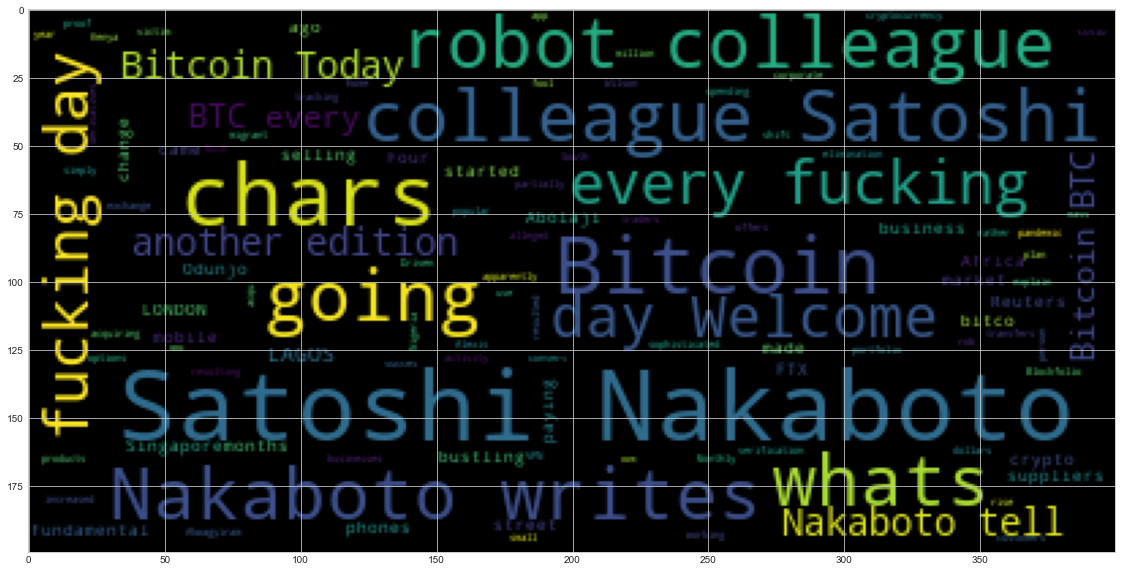

In [58]:
wordcloud(btc.text.str.cat())

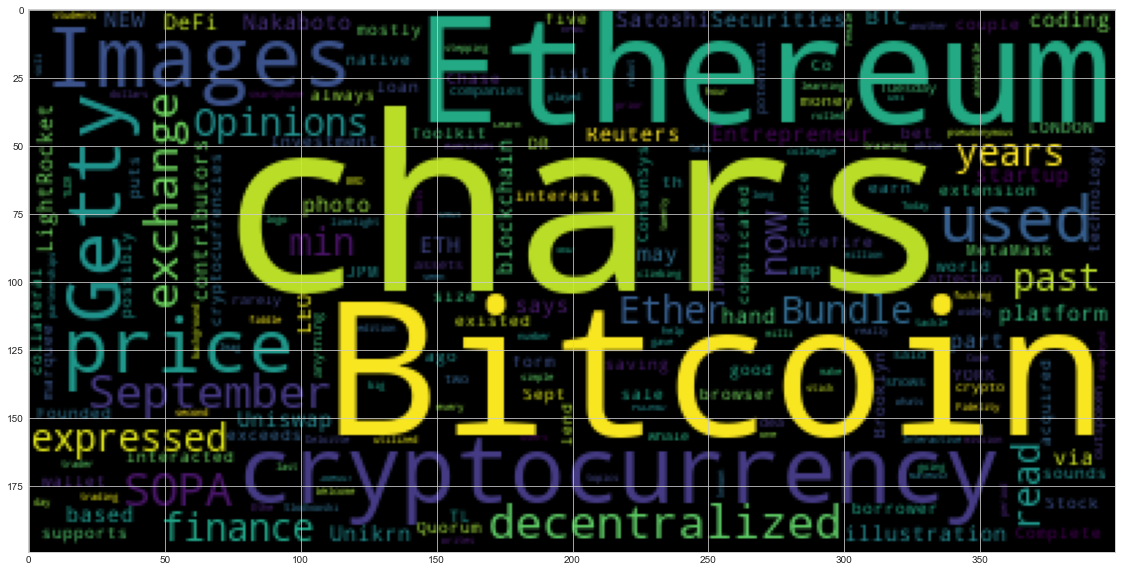

In [59]:
# Generate the Ethereum word cloud
wordcloud(eth.text.str.cat())

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [60]:
import spacy
from spacy import displacy

## Note; I currently am running Anaconda 32bit (Spacy can only be used with a 64 bit version)... Was having issues with installation; so I wrote the code out referencing the class files but could not run the cells. 

In [61]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [62]:
# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

## Bitcoin NER

In [63]:
# Concatenate all of the bitcoin text together
btc_text = btc.text.str.cat()
btc_text

'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]By Alexis Akwagyiram, Tom Wilson\r\n* Monthly crypto transfers to and from Africa rise 55% in a year\r\n* Much of the activity in Nigeria, South Africa and Kenya\r\n* Driven by small businesses and migrant… [+7730 chars]“The COVID-19 pandemic has resulted in a mass shift to working from home, resulting in increased use of corporate VPN and elimination of in-person verification, which can partially explain the succes… [+3548 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos: He started paying his suppliers in bitco… [+7646 chars]LAGOS/LONDON (Reuters) - Four months ago, Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling st

In [65]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_text)
# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [66]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [67]:
# List all Entities
for ent in btc_doc.ents:
    print(ent.text, ent.label_)

---

## Ethereum NER

In [68]:
# Concatenate all of the bitcoin text together
eth_text = eth.text.str.cat()
eth_text

"If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]TL;DR: The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for £29.46 as of Sept. 7, saving you 97% on list price.\r\nThe world of finance has always been complicated, and now th… [+2225 chars]September\r\n18, 2020\r\n6 min read\r\nOpinions expressed by Entrepreneur contributors are their own.\r\nFounded over five years ago, the Ethereum platform and its native ether (ETH)\xa0have existed mostly in t… [+6239 chars]LONDON (Reuters) - It sounds like a surefire bet. You lend money to a borrower who puts up collateral that exceeds the size of the loan, and then you earn interest of about 20%. What could possibly g… [+7143 chars]NEW YORK (Reuters) - Brooklyn-based technology startup ConsenSys has acquired JPMorgan Chase &amp; Co’s (JPM.N) marquee blockchain

In [35]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_text)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [37]:
# List all Entities
for ent in eth_doc.ents:
    print(ent.text, ent.label_)

Trump PERSON
Twitter GPE
this morning TIME
Jack PERSON
the White House ORG
late last year DATE
Amazon Web Services ORG
only about five months ago DATE
Andy Jassy PERSON
Kirk PERSON
neo-Dadaists NORP
Digital ORG
CryptoKitties ORG
2047 DATE
2026 DATE
one CARDINAL
millions CARDINAL
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
Ether PERSON
ETH ORG
ETH ORG
Vitalik Buterin PERSON
Twitter GPE
Ethereum GPE
early this morning TIME
April 30 DATE
201 CARDINAL
chars]Have PERSON
first ORDINAL
SEC ORG
CoinDesk Korea GPE
over $6.1 million MONEY
Ethereum GPE
Independent Security Evaluators ORG
ISE ORG
ETH ORG
just 7 percent PERCENT
a third CARDINAL
Chainanalysis GPE
chars]Cisco CVE-2019-1804 PERSON
Cisco GPE
9000 PRODUCT
Cisco PERSON
hundreds of millions CARDINAL
Ion ORG
Airbnb PERSON
Facebook PERSON
TRON ORG
TRON ORG
Opera ORG
millions of dollars MONEY
Ethereum GPE
Morgan PERSON
Microsoft ORG
Jane Connolly PERSON
Quorum   PERSON
Ethereum GPE
f